This example shows the computation of the DC biases in a resistor
bridge.


In [2]:


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *




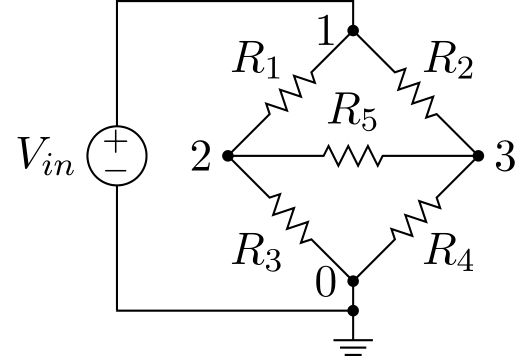

In [9]:

circuit = Circuit('Resistor Bridge')

circuit.V('input', 1, circuit.gnd, 10@u_V)
circuit.R(1, 1, 2, 2@u_kΩ)
circuit.R(2, 1, 3, 1@u_kΩ)
circuit.R(3, 2, circuit.gnd, 1@u_kΩ)
circuit.R(4, 3, circuit.gnd, 2@u_kΩ)
circuit.R(5, 3, 2, 2@u_kΩ)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

for node in analysis.nodes.values():
    print('Node {}: {:4.1f} V'.format(str(node), float(node))) # Fixme: format value + unit


Node 3:  6.0 V
Node 2:  4.0 V
Node 1: 10.0 V
